<a href="https://colab.research.google.com/github/pranavgarg1506/deeplearning/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [24]:
print("TensorFlow Version",tf.__version__)
print("numpy Version",np.__version__)
print("Pandas Version",pd.__version__)

TensorFlow Version 2.4.1
numpy Version 1.19.5
Pandas Version 1.1.5


In [25]:
## loading mnsit dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("training example shape",x_train.shape)
print("test example shape",x_test.shape)


training example shape (60000, 28, 28)
test example shape (10000, 28, 28)


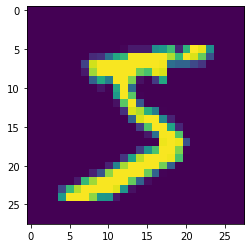

5


In [26]:
## plotting a single image

single_img = x_train[0]
plt.imshow(single_img)
plt.show()
print(y_train[0])


In [27]:
## standardinzing the data

x_train = x_train / 255
x_test = x_test / 255

## reshaping the x_train data to 4 dimensions
## no. of images, height, widthm color_channels

print("Original train shape",x_train.shape)
print("Original test shape",x_test.shape)
print("--------")
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))
print("--------")
print("Modified train shape",x_train.shape)
print("Modified test shape",x_test.shape)



Original train shape (60000, 28, 28)
Original test shape (10000, 28, 28)
--------
--------
Modified train shape (60000, 28, 28, 1)
Modified test shape (10000, 28, 28, 1)


In [28]:
## it is a classification problem lets convert the y into category

y_cat_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_cat_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [29]:
## making the model
numberOfParameters = []
model = tf.keras.models.Sequential()

## add layers

## layer 1
model.add( tf.keras.layers.Conv2D(filters= 32, kernel_size=(5,5),input_shape = (28,28,1), activation='relu', padding='valid')  )
## output shape ---> (28 - 5 + 2 * 0)/1 + 1  --->  24*24*32
numberOfParameters.append((5*5+1)*32)
model.add( tf.keras.layers.MaxPool2D(pool_size=(2,2) ,padding='valid') )
## output shape --->  (24 - 2 )/2 + 1  --->   12*12*32
numberOfParameters.append(0)

## layer 2
model.add( tf.keras.layers.Conv2D(filters= 64, kernel_size=(5,5), activation='relu', padding='valid')  )
## output shape --->   8*8*64
numberOfParameters.append((5*5*32+1)*64)
model.add( tf.keras.layers.MaxPool2D(pool_size=(2,2) ,padding='valid') )
## output shape --->  4*4*64
numberOfParameters.append(0)

# layer 3
model.add( tf.keras.layers.Flatten()  )
# 1*1024
numberOfParameters.append(0)
model.add(tf.keras.layers.Dropout(0.25))
model.add( tf.keras.layers.Dense(64,activation='relu') )
numberOfParameters.append((1024+1)*64)
model.add( tf.keras.layers.Dense(10,activation='softmax') )
numberOfParameters.append((64+1)*10)

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_cat_train, epochs=10, verbose=1, validation_data=(x_test, y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3288 - accuracy: 0.8973 - val_loss: 0.0412 - val_accuracy: 0.9868
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0350 - val_accuracy: 0.9889
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0390 - accuracy: 0.9872 - val_loss: 0.0311 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0259 - val_accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0242 - val_accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0192 - accuracy: 0.9933 - val_loss: 0.0252 - val_accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0253 - val_accuracy:

In [31]:
df = pd.DataFrame(model.history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
5,0.020994,0.992917,0.025210,0.9922
6,0.018160,0.994217,0.025261,0.9933
7,0.015184,0.995117,0.023890,0.9931
8,0.015027,0.995050,0.022377,0.9943
9,0.013332,0.995767,0.022872,0.9935


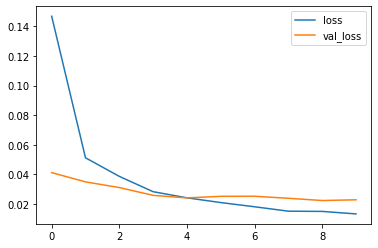

In [32]:
df[['loss', 'val_loss']].plot()

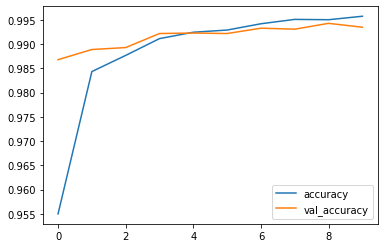

In [33]:
df[['accuracy', 'val_accuracy']].plot()

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0229 - accuracy: 0.9935


[0.02287181466817856, 0.9934999942779541]

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [37]:
print("numberOfParameters",numberOfParameters,sep='\n')

numberOfParameters
[832, 0, 51264, 0, 0, 65600, 650]
